In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url = "https://www.timeanddate.com/weather/?continent=europe"
page = requests.get(url)
soup=BeautifulSoup(page.content,"html.parser")
soup


<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
--><html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Temperatures and Weather in Europe</title><meta content="Weather forecast &amp; current weather worldwide in Fahrenheit or Celsius - hour-by-hour &amp; 2 week forecast plus last week's weather." name="description"/><meta content="https://www.timeanddate.com/scripts/weather_og.php?h1=Weather&amp;h2=Local%20Weather%20in%20Europe" property="og:image"/><meta content="1200" property="og:image:width"/><meta content="630" property="og:image:height"/><meta content="website" property="og:type"/><style>
@font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v8") format("woff2"),url("/common/fonts/iconfont.woff?v8") format("woff"),url("/common/fonts/iconfont.ttf?v8") format("truetype"),url("/common/fonts/iconfont.svg?v8#iconfont") format("svg");font-weight:400;fo

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
-->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Temperatures and Weather in Europe
  </title>
  <meta content="Weather forecast &amp; current weather worldwide in Fahrenheit or Celsius - hour-by-hour &amp; 2 week forecast plus last week's weather." name="description"/>
  <meta content="https://www.timeanddate.com/scripts/weather_og.php?h1=Weather&amp;h2=Local%20Weather%20in%20Europe" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="website" property="og:type"/>
  <style>
   @font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v8") format("woff2"),url("/common/fonts/iconfont.woff?v8") format("woff"),url("/common/fonts/iconfont.ttf?v8") format("truetype"),url("/common/fonts/iconfont.svg?v8#iconfo

In [5]:
soup.find("div",{"class":"bn-header__title-flex"}).h1.get_text()

'Temperatures and Weather in Europe'

In [6]:
mycities = []
temperatures = []
time = []

cities_list = soup.find_all("span",{"class":"my-city__city"})
for i in cities_list:
    name = i.text
    mycities.append(name)
    print(mycities)
    
temperature_list = soup.find_all("span",{"class":"my-city__temp"})
for j in temperature_list:
    temp = j.text
    temperatures.append(temp)
    print(temperatures)
    
clock_list = soup.find_all("span",{"class":"my-city__digitalClock"})
for k in clock_list:
    clock = k.text
    time.append(clock)
    print(time)

df=pd.DataFrame({'mycities_Name': mycities, 'temperatures_degrees' : temperatures, 'digital_clock': time})
df

df.to_csv('Temperatures and Weather in Europe', index=False, encoding='utf-8')
df

['Hannover']
['Hannover', 'New York']
['Hannover', 'New York', 'London']
['Hannover', 'New York', 'London', 'Tokyo']
['13\xa0°C']
['13\xa0°C', '13\xa0°C']
['13\xa0°C', '13\xa0°C', '13\xa0°C']
['13\xa0°C', '13\xa0°C', '13\xa0°C', '17\xa0°C']
['Mo 11:24:46']
['Mo 11:24:46', 'Mo 05:24:46']
['Mo 11:24:46', 'Mo 05:24:46', 'Mo 10:24:46']
['Mo 11:24:46', 'Mo 05:24:46', 'Mo 10:24:46', 'Mo 18:24:46']


,mycities_Name,temperatures_degrees,digital_clock
0,Hannover,13 °C,Mo 11:24:46
1,New York,13 °C,Mo 05:24:46
2,London,13 °C,Mo 10:24:46
3,Tokyo,17 °C,Mo 18:24:46


In [7]:
df_weather = pd.read_csv("Temperatures and Weather in Europe")
df_weather.head()

,mycities_Name,temperatures_degrees,digital_clock
0,Hannover,13 °C,Mo 11:24:46
1,New York,13 °C,Mo 05:24:46
2,London,13 °C,Mo 10:24:46
3,Tokyo,17 °C,Mo 18:24:46


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mycities_Name         4 non-null      object
 1   temperatures_degrees  4 non-null      object
 2   digital_clock         4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [9]:
df_weather.shape

(4, 3)

In [38]:
df_city = df_weather.set_index(["mycities_Name"])
print(df_city)

              temperatures_degrees digital_clock
mycities_Name                                   
Hannover                     13 °C   Mo 11:24:46
New York                     13 °C   Mo 05:24:46
London                       13 °C   Mo 10:24:46
Tokyo                        17 °C   Mo 18:24:46


In [17]:
df_weather.value_counts()

mycities_Name  temperatures_degrees  digital_clock
Hannover       13 °C                 Mo 11:24:46      1
London         13 °C                 Mo 10:24:46      1
New York       13 °C                 Mo 05:24:46      1
Tokyo          17 °C                 Mo 18:24:46      1
dtype: int64

In [21]:
df_weather.sort_values(["temperatures_degrees"],ascending = False)

,mycities_Name,temperatures_degrees,digital_clock
3,Tokyo,17 °C,Mo 18:24:46
0,Hannover,13 °C,Mo 11:24:46
1,New York,13 °C,Mo 05:24:46
2,London,13 °C,Mo 10:24:46


In [24]:
df_weather.groupby(["mycities_Name"])["temperatures_degrees"].min()

mycities_Name
Hannover    13 °C
London      13 °C
New York    13 °C
Tokyo       17 °C
Name: temperatures_degrees, dtype: object

In [26]:
df_weather[df_weather["mycities_Name"].isin(["Hannover","New York","Tokyo"])]

,mycities_Name,temperatures_degrees,digital_clock
0,Hannover,13 °C,Mo 11:24:46
1,New York,13 °C,Mo 05:24:46
3,Tokyo,17 °C,Mo 18:24:46


In [40]:
 df_city.loc["New York":"Tokyo","temperatures_degrees"]

mycities_Name
New York    13 °C
London      13 °C
Tokyo       17 °C
Name: temperatures_degrees, dtype: object

In [41]:
df_city.iloc[:3,:2]

,temperatures_degrees,digital_clock
mycities_Name,,
Hannover,13 °C,Mo 11:24:46
New York,13 °C,Mo 05:24:46
London,13 °C,Mo 10:24:46


In [43]:
df_weather["temperatures_degrees"].min()

'13\xa0°C'

In [44]:
import matplotlib.pyplot as plt

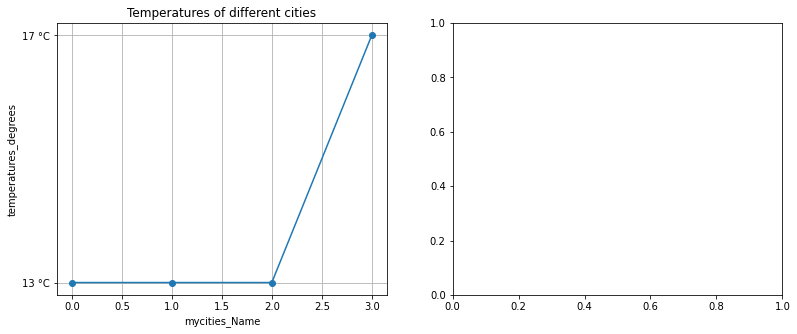

In [49]:
fig, ax = plt.subplots(1,2,figsize = (13,5))
ax[0].plot(df_weather["temperatures_degrees"], marker = "o")
ax[0].set_xlabel("mycities_Name")
ax[0].set_ylabel("temperatures_degrees")
ax[0].set_title("Temperatures of different cities")
ax[0].grid()
plt.show()
